# 1 Mall customer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Understanding

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Year2 Term2/FDS/Week5/Mall_Customers.csv')
mall = data
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Exploration

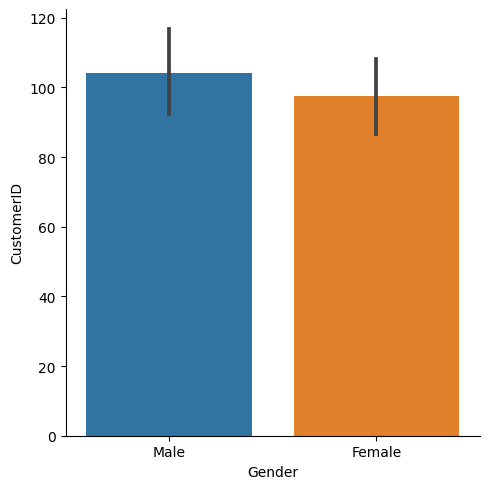

In [6]:
sns.catplot(data=mall, x='Gender', y='CustomerID', kind='bar')

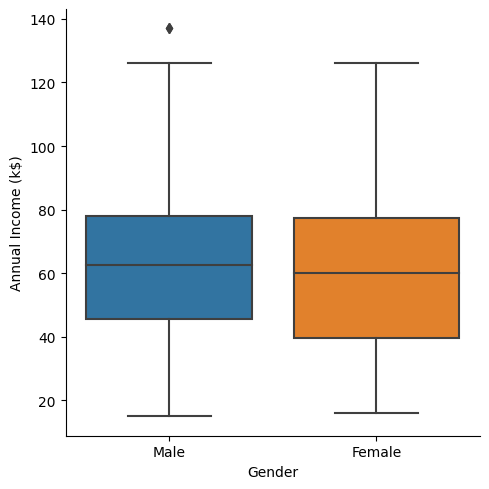

In [7]:
sns.catplot(data=mall, x='Gender', y='Annual Income (k$)', kind='box')

<Axes: xlabel='Age', ylabel='Count'>

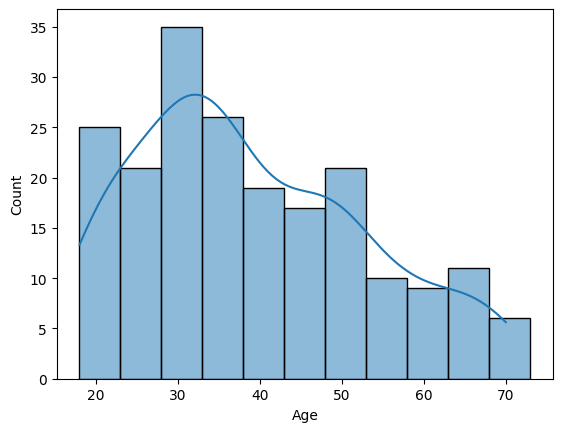

In [8]:
sns.histplot(mall, x="Age", binwidth=5, multiple='stack', kde=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

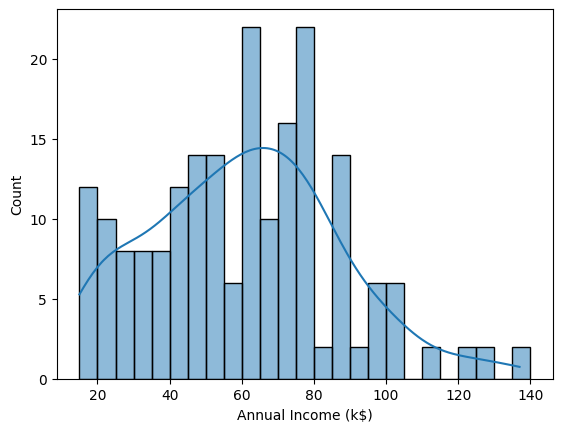

In [9]:
sns.histplot(mall, x="Annual Income (k$)", binwidth=5, multiple='stack', kde=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

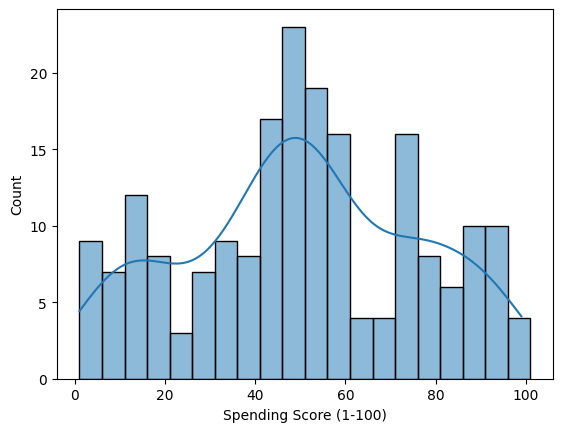

In [10]:
sns.histplot(mall, x='Spending Score (1-100)', binwidth=5, multiple='stack', kde=True)

<Axes: xlabel='Age', ylabel='Count'>

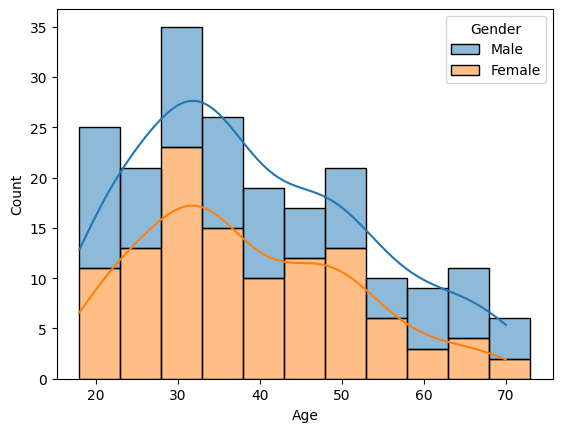

In [11]:
sns.histplot(mall, x="Age", binwidth=5, hue='Gender',multiple='stack', kde=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

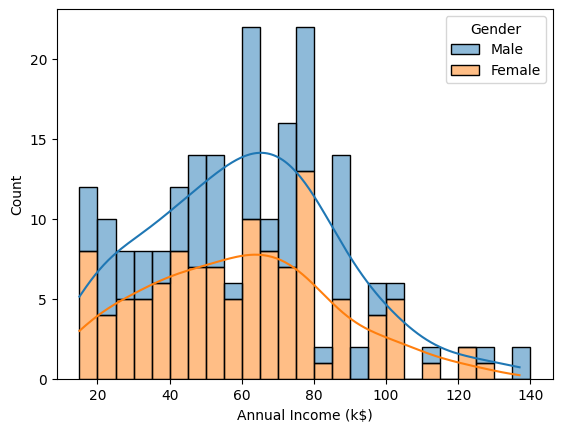

In [12]:
sns.histplot(mall, x="Annual Income (k$)", binwidth=5, hue='Gender',multiple='stack', kde=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

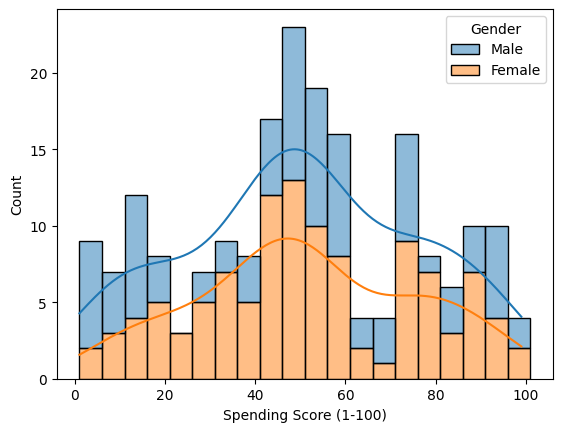

In [13]:
sns.histplot(mall, x='Spending Score (1-100)', binwidth=5, hue="Gender", multiple='stack', kde=True)

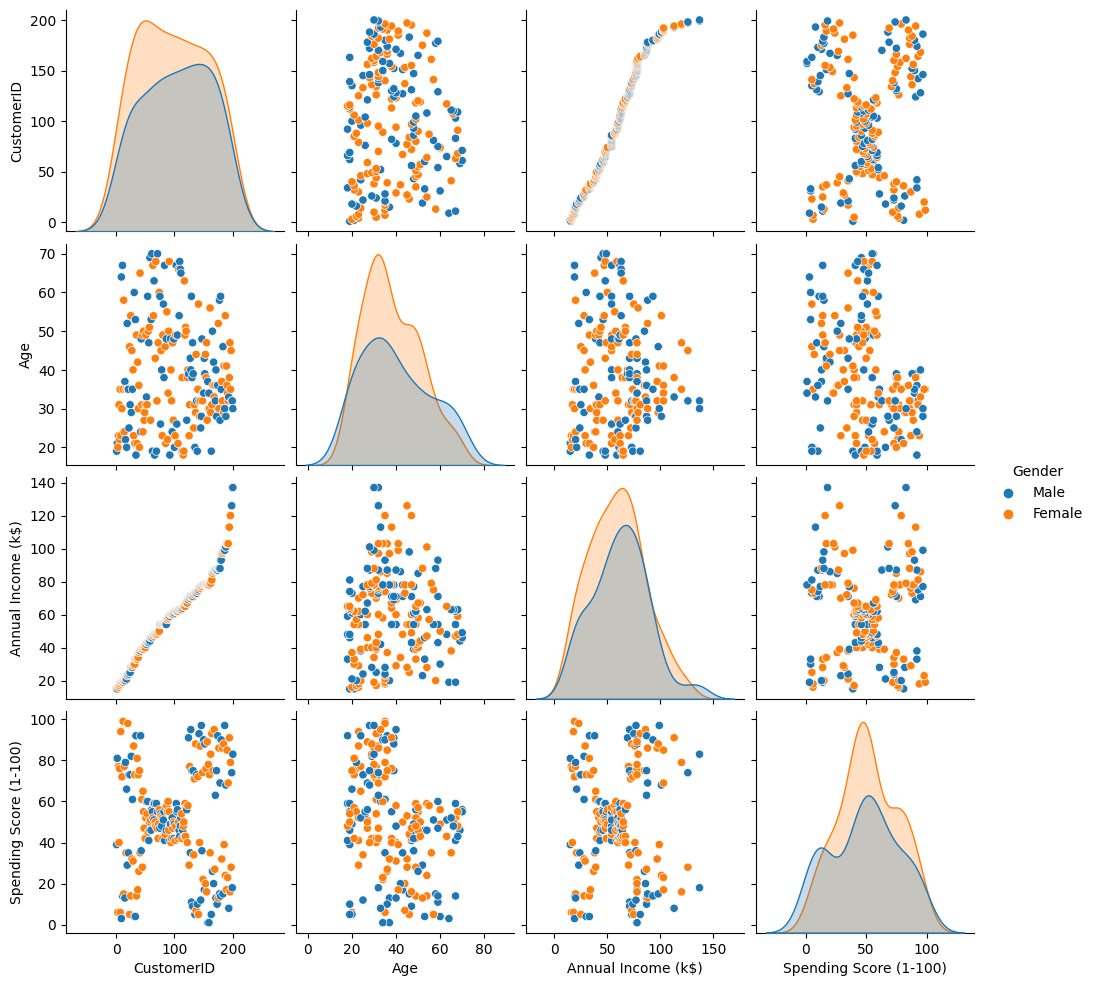

In [14]:
# หาความสัมพันธ์ของ feature
sns.pairplot(mall, hue="Gender")

## Data Preprocessing

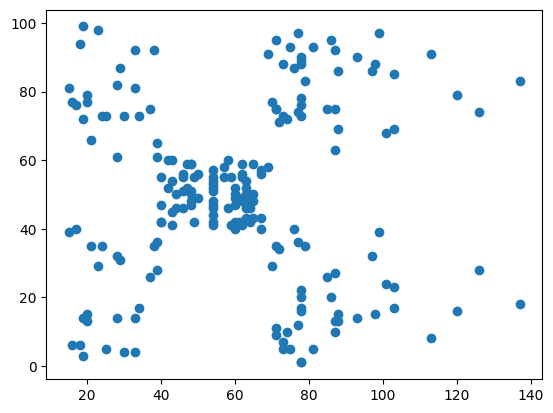

In [15]:
# Feature Selecting ทำการเลือก Feature Annual Income กับ Spending Score เนื่องจาก Gender นั้นความสัมพันธ์ไปในทางเดียวกัน
plt.plot(mall.iloc[:, 3], mall.iloc[:, 4], 'o')

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
gender = LabelEncoder()

In [18]:
Gender_en = gender.fit_transform(mall['Gender'])

In [19]:
mall['Gender_en'] = Gender_en

In [20]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_en
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [21]:
# Clear Outlier
def clear_outlier(data, column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    IQR=q3-q1
    lower = q1-1.5*IQR
    upper = q3+1.5*IQR
    outlier_index = np.where((data[column] <= lower)|(data[column] >= upper))[0]
    data.drop(index=outlier_index, inplace=True)

In [22]:
mall.drop(columns='CustomerID', inplace=True)
mall

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_en
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,0
197,Male,32,126,74,1
198,Male,32,137,18,1


In [23]:
clear_outlier(mall, 'Annual Income (k$)')

In [24]:
mall.shape

(198, 5)

In [25]:
X = mall.iloc[:, 2:-1]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [26]:
X = np.array(X)
X.shape

(198, 2)

## Modeling

In [27]:
# Build Model
from sklearn.cluster import KMeans

In [28]:
K=range(2,15)
E2=[]
for k in K:
    model=KMeans(n_clusters=k,n_init='auto')
    model=model.fit(X)
    E2.append(model.inertia_)

E2

[172491.3181818182,
 101166.23927650377,
 68698.51117686447,
 39407.32005574569,
 33863.22519762846,
 28535.657611733346,
 23301.808159473367,
 21176.312033377253,
 20461.26787936262,
 17139.96755189255,
 15216.914670950711,
 13933.008676050475,
 12840.248258478867]

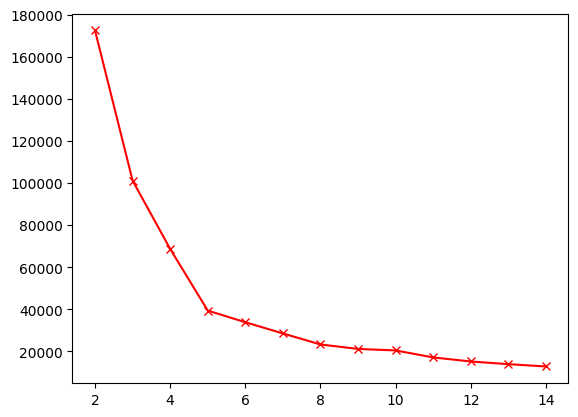

In [29]:
plt.plot(K,E2,'rx-')

In [30]:
# เลือก k = 5 จากกราฟจะเป็นจุดหักพอดี
kmeans=KMeans(n_clusters=5,init='random',n_init='auto',)

In [31]:
kmeans.fit(X)

KMeans(init='random', n_clusters=5, n_init='auto')

In [32]:
kmeans.cluster_centers_

array([[55.0875    , 49.7125    ],
       [25.72727273, 79.36363636],
       [86.34285714, 17.57142857],
       [85.21052632, 82.10526316],
       [26.30434783, 20.91304348]])

In [33]:
MX1=kmeans.cluster_centers_[:, 0]
MX2=kmeans.cluster_centers_[:, 1]

In [34]:
kmeans.labels_

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3],
      dtype=int32)

In [35]:
kmeans.inertia_

39345.27707732771

In [36]:
kmeans.predict(X)

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3],
      dtype=int32)

In [37]:
kmeans.fit_transform(X)

array([[ 41.49415998,  41.76478805,  82.38678121,  21.32900082,
         74.4915226 ],
       [ 50.85189586,  10.85136241,  70.21922537,  61.1410715 ,
         95.46196593],
       [ 58.63970764,  74.00569556, 102.86937364,  18.12673302,
         71.28825647],
       [ 47.6701197 ,  10.01032525,  69.39856385,  57.02566331,
         92.08622401],
       [ 39.30636478,  40.31948855,  80.15939799,  21.23400098,
         72.8798508 ],
       [ 46.27840006,   9.35303902,  68.48321063,  55.8671967 ,
         90.67706323],
       [ 57.32595671,  73.76946444, 101.53455534,  17.06930164,
         69.31553997],
       [ 57.76560666,  16.55094814,  68.25496035,  73.55722539,
        102.52839925],
       [ 59.02851271,  76.65938401, 103.15753222,  19.34504132,
         68.90128401],
       [ 42.41509534,   9.97393297,  66.97723597,  51.60649788,
         86.58827747],
       [ 50.77095934,  65.70891231,  94.98505496,  10.0570208 ,
         67.43749336],
       [ 61.08653954,  20.75675734,  68.332

In [38]:
kmeans.score(X)

-39345.277077327715

Text(0, 0.5, 'Spending Score (1-100)')

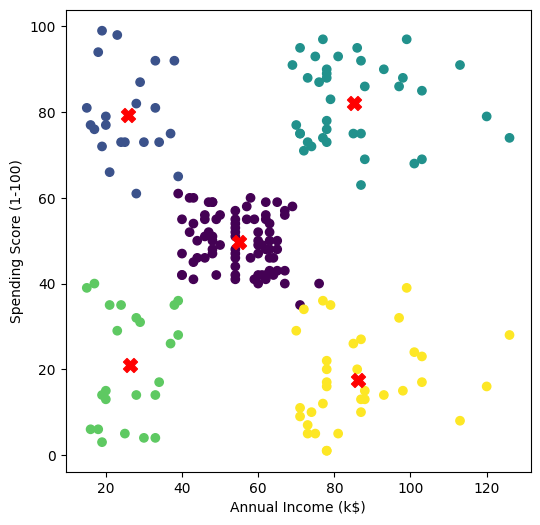

In [39]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X',s=100, color='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

Text(0, 0.5, 'Spending Score (1-100)')

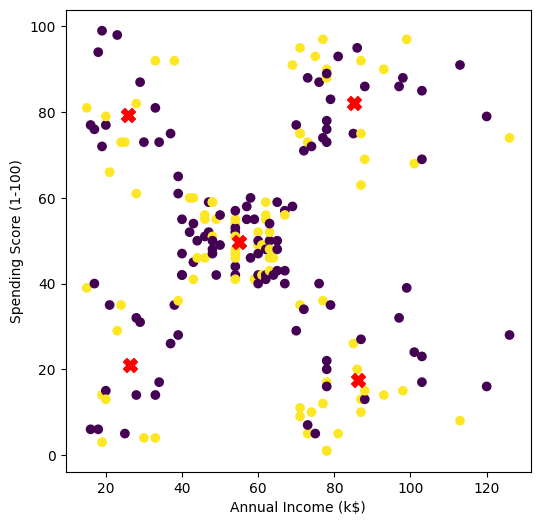

In [40]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=mall['Gender_en'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X',s=100, color='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

## Answer <br>
### 1.1 ลูกค้าควรแบ่งได้ 5 กลุ่ม
### 1.2 กลุ่มแรกคือสีเขียวอ่อน เป็นกลุ่มที่ให้คะแนนสูงจะมีรายได้ต่อปีน้อย <br>กลุ่มที่สองคือสีม่วง เป็นกลุ่มที่ให้คะแนนสูงจะมีรายได้ต่อปีมาก <br> กลุ่มที่สามคือสีเหลือง เป็นกลุ่มที่ให้คะแนนปานกลางจะมีรายได้ต่อปีปานกลาง <br> กลุ่มที่สี่คือสีน้ำเงิน เป็นกลุ่มที่ให้คะแนนน้อยจะมีรายได้ต่อปีน้อย <br> กลุ่มที่ห้าคือสีเขียวเข้ม เป็นกลุ่มที่ให้คะแนนน้อยจะมีรายได้ต่อปีมาก แล้วจากการทำ Data Exploration จะพบว่าแต่ละเพศนั้นมีความสัมพันธ์เรื่องจำนวนรายได้ต่อปีและการให้คะแนนไปในทางเดียวกัน

# 2 Social Network

## Data Understanding

In [231]:
data = pd.read_csv('/content/drive/MyDrive/Year2 Term2/FDS/Week5/Social_Network_Ads_tr.csv')
social = data.copy()
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [232]:
social.shape

(349, 5)

In [233]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          349 non-null    int64 
 1   Gender           349 non-null    object
 2   Age              349 non-null    int64 
 3   EstimatedSalary  349 non-null    int64 
 4   Purchased        349 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 13.8+ KB


In [234]:
social.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [235]:
social['Purchased'].value_counts()

0    242
1    107
Name: Purchased, dtype: int64

In [242]:
from sklearn.preprocessing import LabelEncoder

In [243]:
gender = LabelEncoder()

In [244]:
gender_en = gender.fit_transform(social['Gender'])

In [245]:
social['Gender'] = gender_en

In [194]:
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [247]:
social.drop(['User ID'], axis=1, inplace=True)

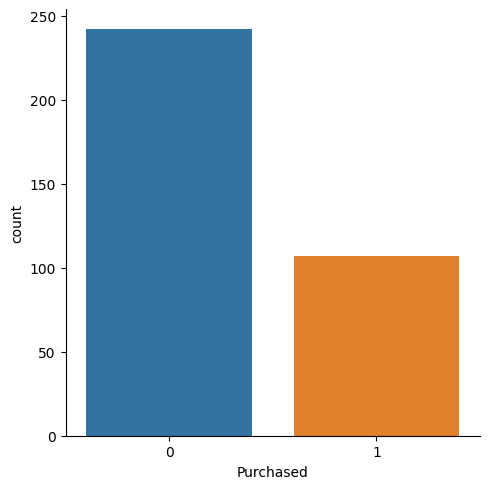

In [248]:
sns.catplot(data=social, x="Purchased", kind="count")

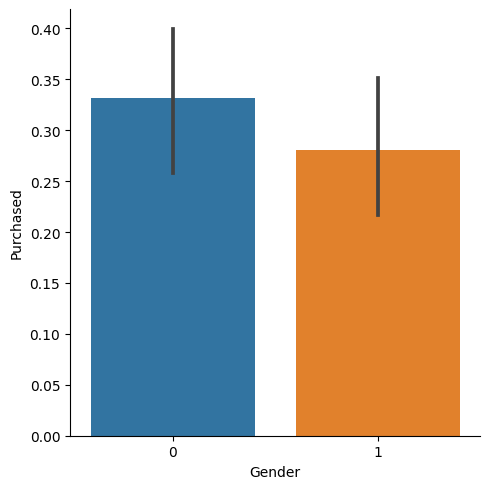

In [254]:
sns.catplot(data=social, x="Gender", y="Purchased", kind="bar")

<Axes: xlabel='EstimatedSalary'>

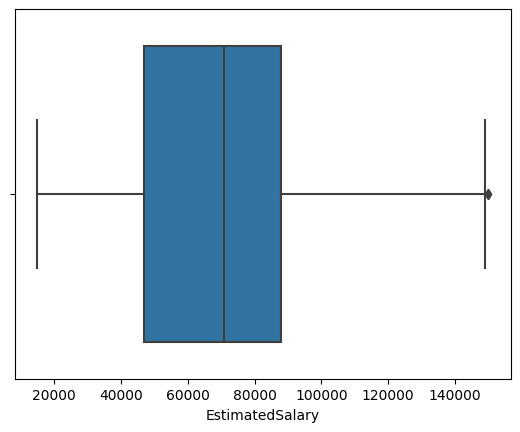

In [249]:
sns.boxplot(x=social['EstimatedSalary'])

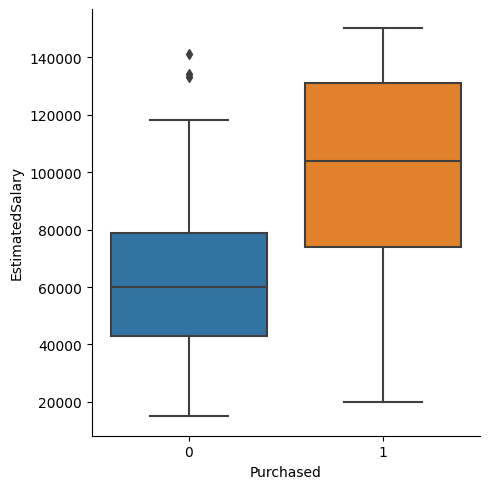

In [250]:
sns.catplot(social, x='Purchased', y='EstimatedSalary',kind='box')

<Axes: xlabel='Age', ylabel='Count'>

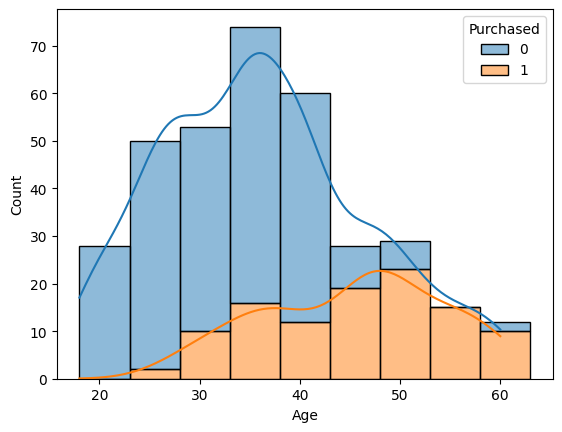

In [251]:
sns.histplot(social, x="Age", binwidth=5, hue='Purchased',multiple='stack', kde=True)

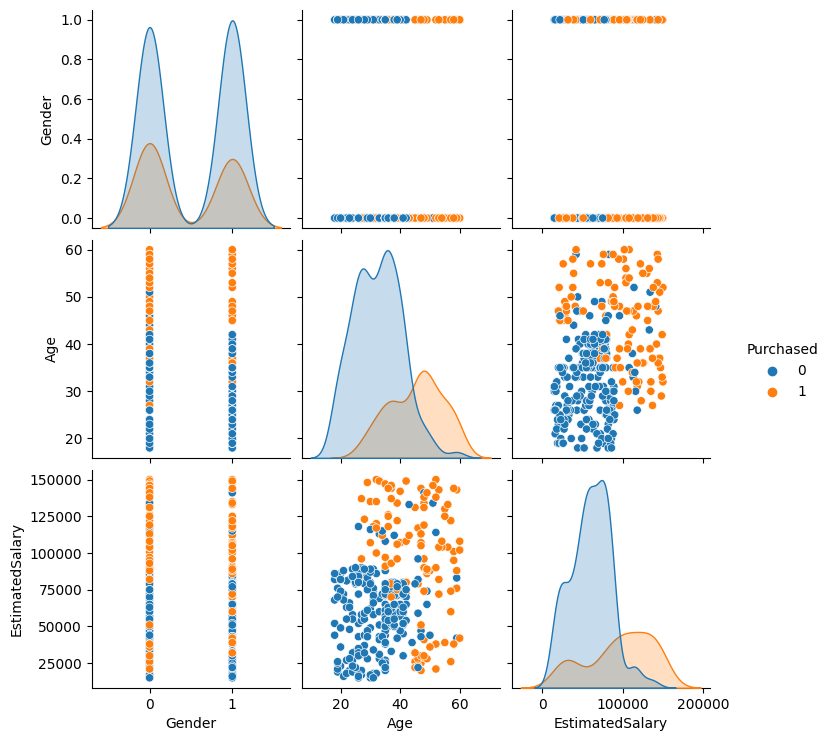

In [252]:
sns.pairplot(social, hue="Purchased")

In [196]:
# Outlier
def clear_outlier(data, column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    IQR=q3-q1
    lower = q1-1.5*IQR
    upper = q3+1.5*IQR
    outlier_index = np.where((data[column] <= lower)|(data[column] >= upper))[0]
    data.drop(index=outlier_index, inplace=True)

In [197]:
clear_outlier(social, "Age")
clear_outlier(social, "EstimatedSalary")

In [198]:
social.shape

(347, 4)

In [199]:
tree_social = social.copy()

In [200]:
from sklearn.preprocessing import StandardScaler

In [201]:
scaler = StandardScaler()
scale_salary = np.array(social['EstimatedSalary']).reshape(-1, 1)
scale_age = np.array(social['Age']).reshape(-1, 1)

In [202]:
scaled_salary = scaler.fit_transform(scale_salary)
scaled_age = scaler.fit_transform(scale_age)

In [203]:
social['EstimatedSalary'] = scaled_salary
social['Age'] = scaled_age
social.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.700161,-1.525480,0
1,1,-0.126945,-1.496038,0
2,0,-1.011879,-0.818867,0
3,0,-0.913553,-0.406676,0
4,1,-1.700161,0.152726,0


### 2.1 แบ่งข้อมูล

In [157]:
# split Data to Train and Test
from sklearn.model_selection import train_test_split

In [158]:
X = social.iloc[:, :-1]
y = social.iloc[:, -1]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (277, 3)
X_test shape: (70, 3)
y_train shape: (277,)
y_test shape: (70,)


## Model Naive Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB

In [113]:
gnb = GaussianNB()

In [114]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
scores = cross_val_score(gnb, X_train, y_train, cv=5)

In [115]:
print("Cross Validation Score :{:.2f}".format(scores.mean()))

Cross Validation Score :0.87


In [116]:
gnb.fit(X_train, y_train)

GaussianNB()

### Testing

In [117]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0])

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
accuracy_score(y_test, y_pred)

0.8857142857142857

In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[50,  3],
       [ 5, 12]])

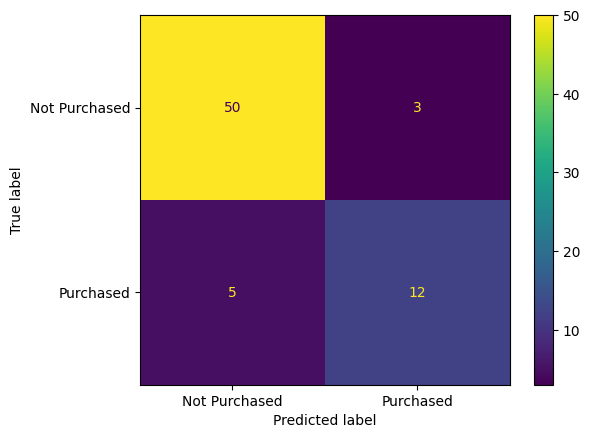

In [122]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=["Not Purchased", "Purchased"]).plot()

In [123]:
#precision & recall
from sklearn.metrics import precision_score, recall_score

In [124]:
precision_score(y_test, y_pred, average='macro')

0.8545454545454545

In [125]:
recall_score(y_test, y_pred, average='macro')

0.8246392896781354

## Model Decision Tree

In [256]:
# ทำข้อมูลใหม่ป้องกัน Monotonic
X_tree = tree_social.iloc[:, :-1]
y_tree = tree_social.iloc[:, -1]

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.2,)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (277, 3)
X_test shape: (70, 3)
y_train shape: (277,)
y_test shape: (70,)


In [270]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)

In [271]:
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, X_train, y_train, cv=5)

In [272]:
print("Cross Validation Score :{:.2f}".format(scores.mean()))

Cross Validation Score :0.89


In [273]:
clf = clf.fit(X_train, y_train)

### Testing

In [274]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [275]:
accuracy_score(y_test, y_pred)

0.9285714285714286

In [276]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[45,  3],
       [ 2, 20]])

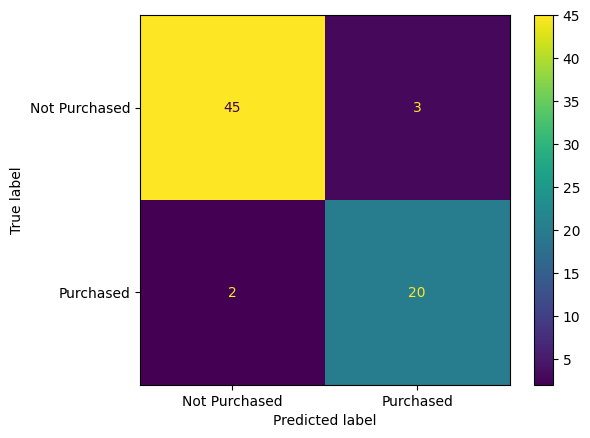

In [277]:
ConfusionMatrixDisplay(cm,display_labels=["Not Purchased", "Purchased"]).plot()

In [278]:
precision_score(y_test, y_pred, average='macro')

0.9135060129509713

In [279]:
recall_score(y_test, y_pred, average='macro')

0.9232954545454546

[Text(0.5, 0.8333333333333334, 'x[2] <= 89500.0\ngini = 0.42\nsamples = 277\nvalue = [194, 83]'),
 Text(0.25, 0.5, 'x[1] <= 44.5\ngini = 0.238\nsamples = 210\nvalue = [181, 29]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.044\nsamples = 176\nvalue = [172, 4]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.389\nsamples = 34\nvalue = [9, 25]'),
 Text(0.75, 0.5, 'x[1] <= 26.5\ngini = 0.313\nsamples = 67\nvalue = [13, 54]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.281\nsamples = 65\nvalue = [11, 54]')]

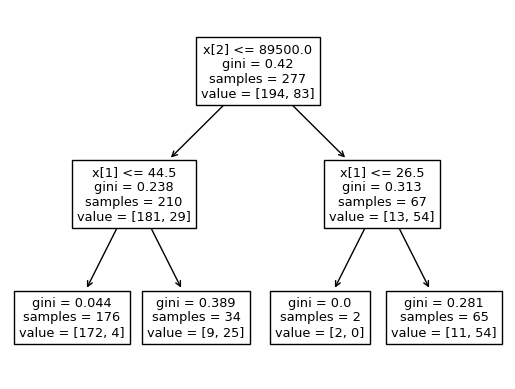

In [280]:
tree.plot_tree(clf)

## Answer <br>
### จากการ plpt graph กราฟจะสังเกตุเห็นว่า ลูกค้าที่ไม่ซื้อประกันจะมีลักษณะรายได้น้อยกว่าหรือเท่ากัน 89500 และอายุน้อยกว่า 44.5 ปี หรือรายได้มากกว่านั้นแต่อายุน้อยกว่า 26.5 <br>
### แต่กลุ่มที่ซื้อประกันมีรายได้มากกว่า 89500 และอายุมากกว่า 26.5 ปี หรือรายได้น้อยกว่านี้แต่อายุมากกว่า 44.5 ปี